# 效能衡量指標(Metrics)

In [1]:
import tensorflow as tf
from tensorflow.keras import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix

## 範例1. 混淆矩陣(Confusion Matrix)

In [2]:
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 1, 1, 1, 1, 1] # 實際值
y_pred = [0, 1, 0, 1, 0, 1, 0, 1] # 預測值

# 混淆矩陣(Confusion Matrix)
tn, fp, fn, tp  = confusion_matrix(y_true, y_pred).ravel()
print(f'TP={tp}, FP={fp}, TN={tn}, FN={fn}')  

TP=3, FP=1, TN=2, FN=2


## 繪圖

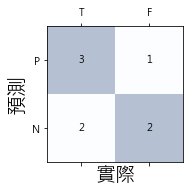

In [11]:
# 修正中文問題
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 顯示矩陣
fig, ax = plt.subplots(figsize=(2.5, 2.5))

# 1:藍色, 0:白色
ax.matshow([[1, 0], [0, 1]], cmap=plt.cm.Blues, alpha=0.3)

# 標示文字
ax.text(x=0, y=0, s=tp, va='center', ha='center')
ax.text(x=1, y=0, s=fp, va='center', ha='center')
ax.text(x=0, y=1, s=tn, va='center', ha='center')
ax.text(x=1, y=1, s=fn, va='center', ha='center')

plt.xlabel('實際', fontsize=20)
plt.ylabel('預測', fontsize=20)

# x/y 標籤
plt.xticks([0,1], ['T', 'F'])
plt.yticks([0,1], ['P', 'N'])
plt.show()

## 範例2. 準確率

In [4]:
m = metrics.Accuracy()
m.update_state(y_true, y_pred)

print(f'準確率:{m.result().numpy()}')
print(f'驗算={(tp+tn) / (tp+tn+fp+fn)}')  

準確率:0.625
驗算=0.625


## 範例3. 精確率

In [5]:
m = metrics.Precision()
m.update_state(y_true, y_pred)

print(f'精確率:{m.result().numpy()}')
print(f'驗算={(tp) / (tp+fp)}')  

精確率:0.75
驗算=0.75


## 範例4. 召回率

In [6]:
m = metrics.Recall()
m.update_state(y_true, y_pred)

print(f'召回率:{m.result().numpy()}')
print(f'驗算={(tp) / (tp+fn)}')  

召回率:0.6000000238418579
驗算=0.6


## 範例5. 依資料檔data/auc_data.csv計算AUC

## 讀取資料

In [7]:
# 讀取資料檔
import pandas as pd
df=pd.read_csv('./data/auc_data.csv')
df

,predict,actual
0,0.11,0
1,0.35,0
2,0.72,1
3,0.10,1
4,0.99,1
5,0.44,1
6,0.32,0
7,0.80,1
8,0.22,1
9,0.08,0


## 以Scikit-learn函數計算AUC

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# fpr：假陽率，tpr：真陽率, threshold：各種決策門檻
fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
print(f'假陽率={fpr}\n\n真陽率={tpr}\n\n決策門檻={threshold}')

假陽率=[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ]

真陽率=[0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ]

決策門檻=[1.99 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]


## 繪製AUC

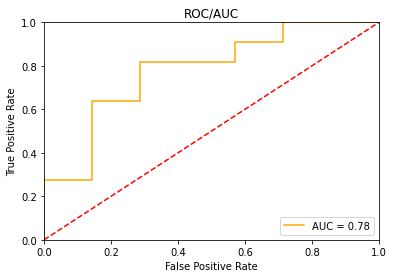

In [9]:
# 繪圖
auc1 = auc(fpr, tpr)
## Plot the result
plt.title('ROC/AUC')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    


## 以TensorFlow函數計算AUC

In [10]:
m = metrics.AUC()
m.update_state(df['actual'], df['predict'])

print(f'AUC:{m.result().numpy()}')

AUC:0.7792208194732666
